In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

#importing the datasets 

veganproducts = pd.read_csv('veganproducts.csv')
cleanskincare = pd.read_csv('cleanskincare.csv')
eyecream_lipcare = pd.read_csv('eyecream_lipcare.csv')
moist_cleans = pd.read_csv('moist_cleans.csv')
sun_treatments = pd.read_csv('sun_treatments.csv')
skincare_data = pd.concat([eyecream_lipcare,moist_cleans,sun_treatments],ignore_index=True)


In [2]:
#REMOVE duplicates
skincare_data = skincare_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [3]:
#scrubbing price field
skincare_data['price_scrub'] = [float(i.replace('$','')) for i in skincare_data['price']]
#skincare_data

In [4]:
#defining new variables
veganproducts['is_vegan']= [1 if cat=='vegan-skin-care' else 0 for cat in veganproducts['category']]
cleanskincare['is_clean']=[1 if cat=='clean-skin-care' else 0 for cat in cleanskincare['category']]
#skincare_data['notvegan']= [1 if i==0 else 0 for i in skincare_data['is_vegan']]
#skincare_data['eye_care']= [1 if cat =='eye-treatment-dark-circle-treatment' else 0 for cat in skincare_data['category']]
#skincare_data['lip_care']= [1 if cat =='lip-treatments' else 0 for cat in skincare_data['category']]


In [5]:
#DEFINING RATING
skincare_data['rating'] = (skincare_data['num_five']*5 + \
                              skincare_data['num_four']*4 + \
                              skincare_data['num_three']*3 + \
                              skincare_data['num_two']*2 + \
                              skincare_data['num_one']*1) / (skincare_data['num_five'] + \
                                                 skincare_data['num_four'] +
                                                 skincare_data['num_three'] + 
                                                 skincare_data['num_two'] +
                                                 skincare_data['num_one'])

In [6]:
#left join the flags 
skincare_data2=pd.merge(skincare_data,veganproducts[['prod_name','is_vegan']], on='prod_name', how='left')
skincare_data3=pd.merge(skincare_data2,cleanskincare[['prod_name','is_clean']],on='prod_name',how='left')
skincare_data = skincare_data3

In [7]:
#skincare_data

In [8]:
skincare_data['is_vegan']=skincare_data['is_vegan'].fillna(0)
skincare_data['is_clean']=skincare_data['is_clean'].fillna(0)

In [9]:
skincare_data['sum_vegan_clean'] = skincare_data['is_vegan'] +skincare_data['is_clean']


In [10]:
skincare_data['sum_vegan_clean'] = skincare_data['is_vegan'] +skincare_data['is_clean']
skincare_data['vegan_and_clean'] = [1 if i==2 else 0 for i in skincare_data['sum_vegan_clean']]
skincare_data['vegan_only'] = np.where(skincare_data.is_vegan==1, \
                                      np.where(skincare_data.vegan_and_clean!=1,1,0),0)
skincare_data['clean_only'] = np.where(skincare_data.is_clean==1, \
                                      np.where(skincare_data.vegan_and_clean!=1,1,0),0)
skincare_data['all_other'] = np.where(skincare_data.is_vegan==0, \
                                      np.where(skincare_data.is_clean==0,1,0),0)



In [11]:
skincare_data_1 = skincare_data[skincare_data['vegan_and_clean']==1]
skincare_data_2 =  skincare_data[skincare_data['vegan_only']==1]
skincare_data_3 = skincare_data[skincare_data['clean_only']==1]
skincare_data_4 = skincare_data[skincare_data['all_other']==1]

skincare_data_1['product_type'] = 'Vegan and Clean' 
skincare_data_2['product_type'] = 'Vegan'
skincare_data_3['product_type'] = 'Clean'
skincare_data_4['product_type'] = 'Other'

skincare_data = pd.concat([skincare_data_1, skincare_data_2,skincare_data_3, skincare_data_4], axis=0)

/Users/jessiewang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jessiewang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/jessiewang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [12]:
skincare_datasub = skincare_data[['category','vegan_only','clean_only','vegan_and_clean','all_other']]
skincare_datasub=skincare_datasub.groupby('category').agg(sum)

compare_cat= skincare_datasub

In [13]:
#compare_cat=compare_cat.reset_index()
#del compare_cat['index']
#compare_cat

compare_cat = compare_cat.sort_values('all_other')
compare_cat

,vegan_only,clean_only,vegan_and_clean,all_other
category,,,,
cleanser,9,28,34,116
sunscreen-sun-protection,16,21,36,116
lip-treatments,5,30,12,129
eye-treatment-dark-circle-treatment,16,28,30,147
facial-treatments,97,71,86,336
moisturizing-cream-oils-mists,76,114,162,476


In [14]:
list(range(len(compare_cat['vegan_only'])))

[0, 1, 2, 3, 4, 5]

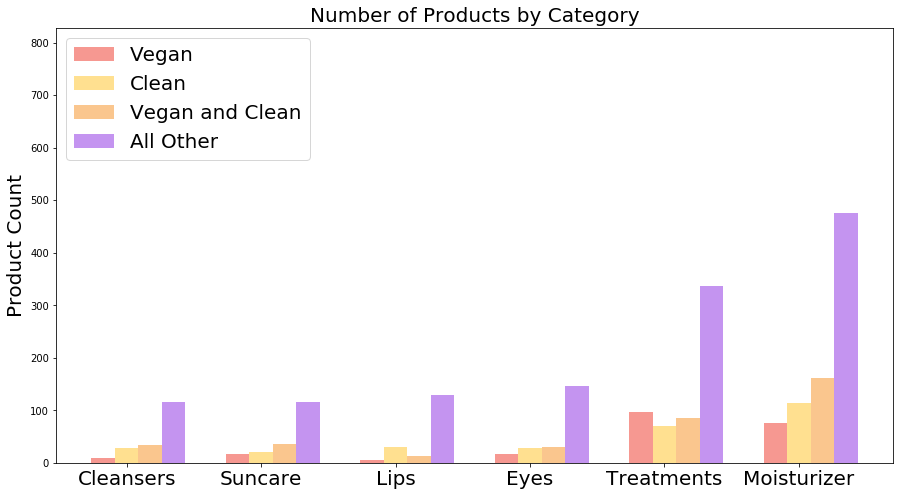

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pos = list(range(len(compare_cat['vegan_only'])))
pos = [i+.35 for i in pos]
width = 0.175 
    
fig, ax = plt.subplots(figsize=(15,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        compare_cat['vegan_only'], 
        # of width
        width, 
        alpha=0.5, 
        color='#EE3224')

plt.bar([p + width for p in pos], 
        compare_cat['clean_only'],
        width, 
        alpha=0.5, 
        color='#FFC222')

plt.bar([p + width*2 for p in pos], 
        compare_cat['vegan_and_clean'], 
        width, 
        alpha=0.5, 
        color='#F78F1E') 


plt.bar([p + width*3 for p in pos], 
        compare_cat['all_other'], 
        width, 
        alpha=0.5, 
        color='#8A2BE2')



# Set the y axis label
ax.set_ylabel('Product Count', fontsize=20)

# Set the chart's title
ax.set_title('Number of Products by Category', fontsize=20)
             
# Set the labels for the x ticks
labels = ['Cleansers', 'Suncare','Lips','Eyes','Treatments','Moisturizer']
ax.set_xticks([.525+i for i in range(0,6)])
ax.set_xticklabels(labels, fontsize=20)

# Setting the x-axis and y-axis limits
plt.xlim(0, max(pos)+width*5)
plt.ylim([0, max(compare_cat['vegan_only'] + compare_cat['clean_only'] + \
                 compare_cat['vegan_and_clean'] + compare_cat['all_other'])] )

# Adding the legend and showing the plot
plt.legend(['Vegan', 'Clean', 'Vegan and Clean', 'All Other'], \
           loc='upper left', fontsize=20)

plt.show()

In [103]:
#PRICE ANALYSIS

#skincare_data.groupby('category').agg(sum)


,Unnamed: 0,num_prodsizes,num_five,num_four,num_three,num_two,num_one,price_scrub,rating,is_vegan,is_clean,sum_vegan_clean,vegan_and_clean,vegan_only,clean_only,all_other
category,,,,,,,,,,,,,,,,
cleanser,169814,41,13600,3762,1604,1093,1154,5682.99,766.902414,43.0,62.0,105.0,34,9,28,116
eye-treatment-dark-circle-treatment,24310,18,30238,13089,6084,4263,4624,14394.97,866.679790,46.0,58.0,104.0,30,16,28,147
facial-treatments,282484,215,127519,38784,14775,10597,14416,42200.58,2442.925729,183.0,157.0,340.0,86,97,71,336
lip-treatments,54296,0,55980,14498,6816,4955,5371,4323.50,683.331740,17.0,42.0,59.0,12,5,30,129
moisturizing-cream-oils-mists,338307,339,187679,54495,23275,17649,18022,52361.02,3398.583425,238.0,276.0,514.0,162,76,114,476
sunscreen-sun-protection,17711,54,37257,12595,5796,4884,4635,8627.50,755.114944,52.0,57.0,109.0,36,16,21,116


[Text(0, 0, 'Eyes'),
 Text(0, 0, 'Lips'),
 Text(0, 0, 'Moisturizer'),
 Text(0, 0, 'Cleanser'),
 Text(0, 0, 'Suncare'),
 Text(0, 0, 'Treatments')]

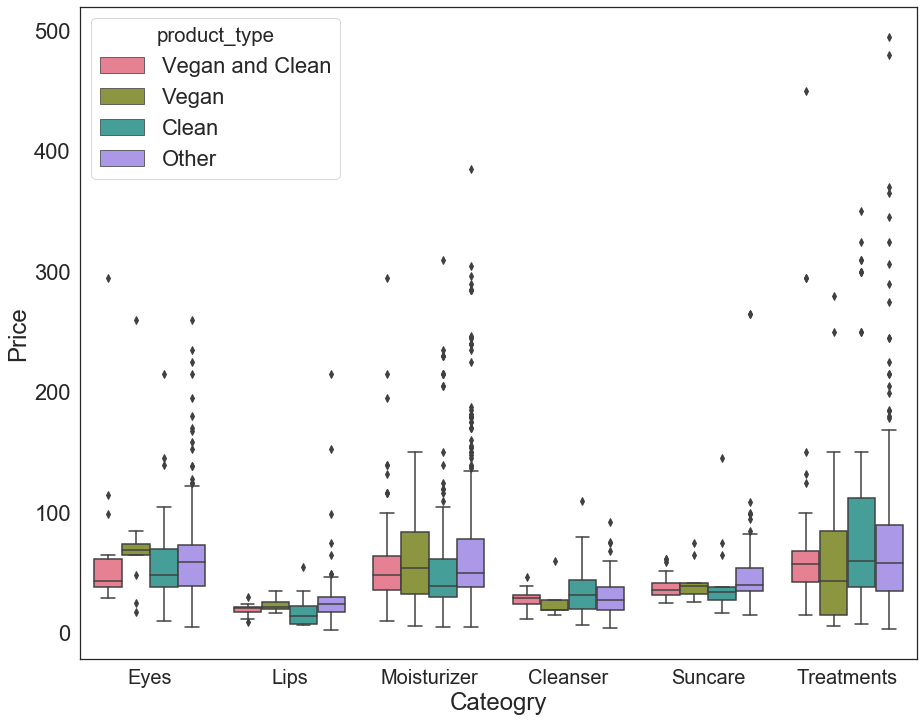

In [106]:
#Analyzing Price by Grouped BoxPlot
import seaborn as sns
plt.figure(figsize=(15,12))
sns.set(font_scale=2) 
sns.set_style(style="white")
# Grouped boxplot
ax=sns.boxplot(x="category", y="price_scrub", hue="product_type", \
            data=skincare_data, palette='husl')
labels = ['Eyes','Lips', 'Moisturizer','Cleanser','Suncare','Treatments']

ax.set(xlabel= "Cateogry", ylabel="Price")
ax.set_xticklabels(labels, fontsize=20)



[Text(0, 0.5, 'Number of Loves'), Text(0.5, 0, 'Rating')]

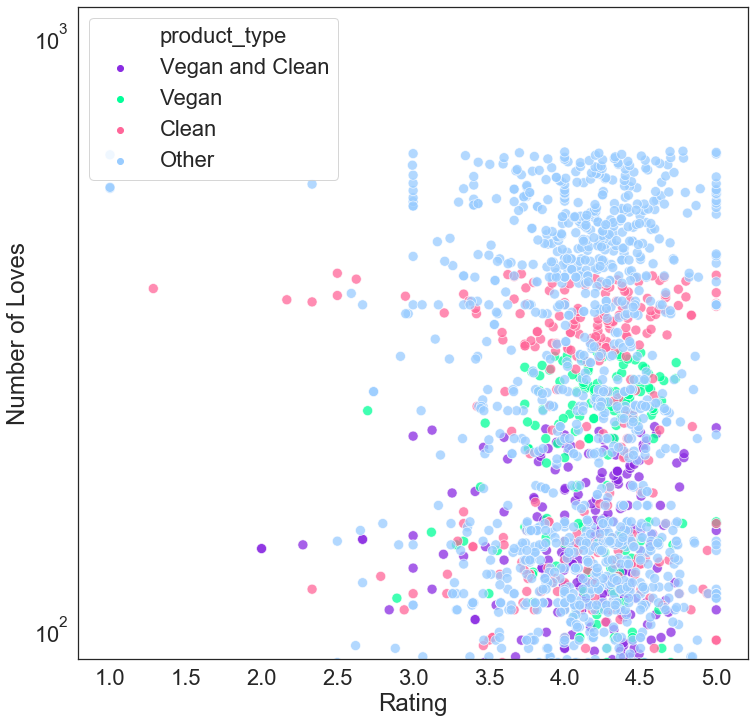

In [18]:
#Scatter Plot # of Loves vs Rating - color represents product type
plt.figure(figsize=(12,12))
sns.set(font_scale=2) 
sns.set_style(style="white")
g = sns.scatterplot(x=skincare_data['rating'], y=skincare_data['num_loves'], hue="product_type", 
              data=skincare_data, s=100, alpha = 0.75,
                    palette=['#8A2BE2','#00ff99','#ff6699','#99ccff'], legend='full')
g.set(yscale="log")

g.set(xlabel= "Rating", ylabel="Number of Loves")



[Text(0, 0.5, 'Number of Loves'), Text(0.5, 0, 'Rating')]

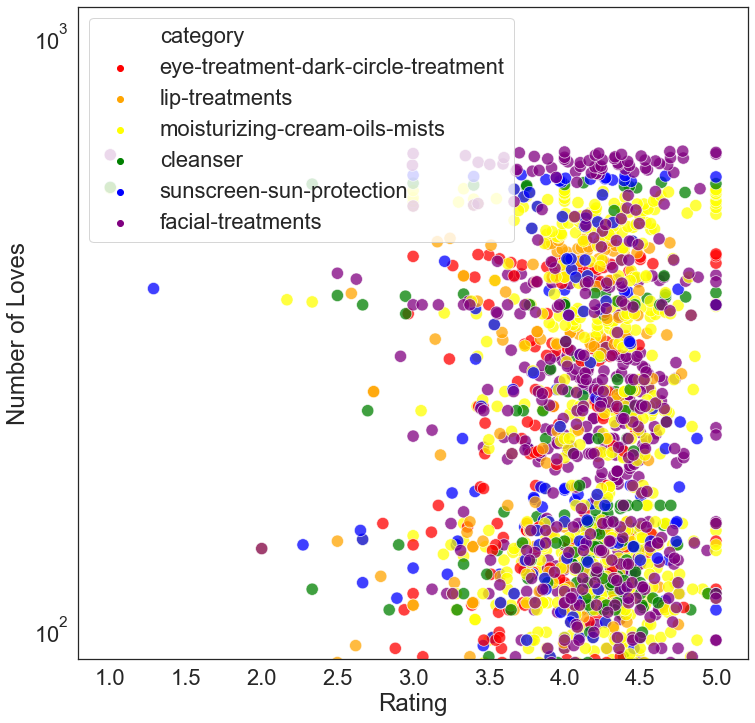

In [115]:
#Scatterplot of Number of Loves vs Ratings, color distinguishes product category
plt.figure(figsize=(12,12))
sns.set(font_scale=2) 
sns.set_style(style="white")

import seaborn as sns
g = sns.scatterplot(x=skincare_data['rating'], y=skincare_data['num_loves'], hue="category", 
              palette = ['red','orange','yellow','green','blue','purple'],data=skincare_data, s=150, alpha = 0.75)
g.set(yscale="log")
g.set(xlabel= "Rating", ylabel="Number of Loves")



In [20]:
#Average Rating for all products separated by product type
skincare_datasub = skincare_data[['product_type','rating']]
compare_ratings=skincare_datasub.groupby(['product_type']).mean()
compare_ratings=compare_ratings.reset_index()

<BarContainer object of 4 artists>

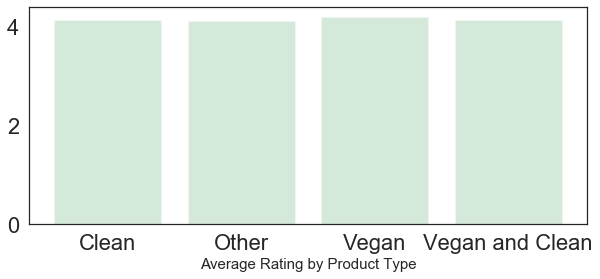

In [21]:
plt.figure(figsize=(10,4))
plt.xlabel('Average Rating by Product Type', size=15)
plt.bar(compare_ratings['product_type'],compare_ratings['rating'], alpha = 0.25,color='g')

In [22]:
#Comparing Clean Ingredients vs Non-Clean Products


In [116]:
skincare_data_fil = skincare_data[skincare_data['category']=='moisturizing-cream-oils-mists']
#skincare_data_fil = skincare_data[skincare_data['category']=='facial-treatments']

In [117]:
cleanproducts_base = skincare_data_fil[skincare_data_fil['product_type']=='Clean']
vegan_cleanproducts_base = skincare_data_fil[skincare_data_fil['product_type']=='Vegan and Clean']
otherproducts = skincare_data_fil[skincare_data_fil['product_type']=='Other']

In [118]:
cleanproducts = pd.concat([cleanproducts_base,vegan_cleanproducts_base],ignore_index=True)


In [119]:
blank_c =[]
for i in cleanproducts['ingredients']:
     blank_c.append(i.split(', '))


blank_o =[]
for i in otherproducts['ingredients']:
     blank_o.append(i.split(', '))

In [120]:
flat_ingredients_c = [a for sublist in blank_c for a in sublist]
flat_ingredients_o = [a for sublist in blank_o for a in sublist]

In [123]:
dict_clean = dict((ingredient, flat_ingredients_c.count(ingredient)) for ingredient in flat_ingredients_c)
dict_other = dict((ingredient, flat_ingredients_o.count(ingredient)) for ingredient in flat_ingredients_o)



In [131]:
#top20 vegan ingredients - show venn diagram 
top50_clean = sorted(dict_clean, key=dict_clean.get)[-50:] 
top50_other = sorted(dict_other, key=dict_other.get)[-50:] 

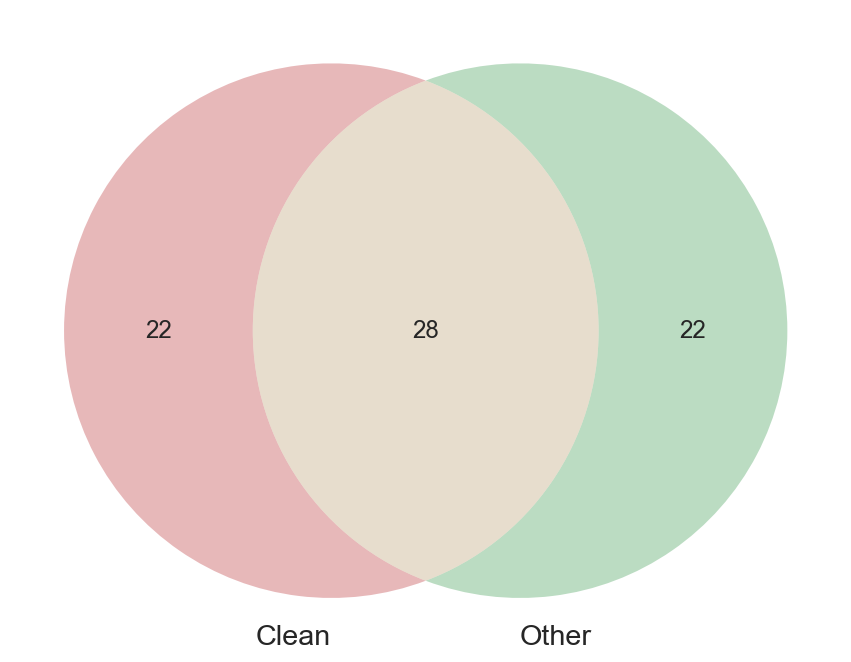

In [132]:
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))

labels = ['Clean', 'Other']

venn2([set(top50_clean),set(top50_other)],set_labels = labels)


In [133]:
top50_clean

['Insoluble Plastic Microbeads (This prohibited ingredient applies to products that are meant to be rinsed off )',
 'Resorcinol',
 'Talc (Talc that is free of any asbestos can be used in the formulation provided that Brand conducts testing to ensure that talc is free of any asbestos.)',
 'Toluene',
 'Butylated hydroxyanisole (BHA)',
 'Butylated hydroxytoluene (BHT) that is 0.1% or more of total formula',
 'Ethanolamines DEA/TEA/MEA/ETA',
 'Petrolatum and Parrafin that is not USP grade',
 'Phenoxyethanol that is 1% or more of total formulation',
 'Polyacrylamide & Acrylamide',
 'The following types of Styrene (Bromostyrene',
 'Deastyrene/acrylates/dvbcopolymer',
 'styrene oxide',
 'styrene)',
 '1,4 Dioxane in final formulas must comply with the thresholds as follows: (10 or < ppm for products that are meant to be rinsed off',
 'wiped off or removed',
 '3ppm or < for products that are meant to remain on the skin).',
 'Acrylates/C10-30 Alkyl Acrylate Crosspolymer',
 'Retinyl Palmitate',
 

In [134]:
top50_other

['Alcohol',
 'Betaine',
 'Bht',
 'Hydrogenated Lecithin',
 'Dipropylene Glycol',
 'Polysorbate 20',
 'Chlorphenesin',
 'Peg-100 Stearate',
 'Niacinamide',
 'Lecithin',
 '1,2-Hexanediol',
 'Sodium Citrate',
 'Camellia Sinensis Leaf Extract',
 'Silica',
 'Caffeine',
 'Adenosine',
 'not found',
 'Cyclopentasiloxane',
 'Acrylates/C10-30 Alkyl Acrylate Crosspolymer',
 'Cetyl Alcohol',
 'Squalane',
 'Geraniol',
 'Cetearyl Alcohol',
 'Citronellol',
 'Pentylene Glycol',
 'Fragrance',
 'Disodium EDTA',
 'Carbomer',
 'Sodium Hydroxide',
 'Sodium Benzoate',
 'Stearic Acid',
 'Potassium Sorbate',
 'Propanediol',
 'Caprylic/Capric Triglyceride',
 'Limonene',
 'Glyceryl Stearate',
 'Linalool',
 'Disodium Edta',
 'Xanthan Gum',
 'Citric Acid',
 'Sodium Hyaluronate',
 'Caprylyl Glycol',
 'Ethylhexylglycerin',
 'Tocopheryl Acetate',
 'Tocopherol',
 'Dimethicone',
 'Butylene Glycol',
 'Water',
 'Phenoxyethanol',
 'Glycerin']

In [36]:
#checkin animal testing status in brands 
v_list= skincare_data[skincare_data['product_type']=="Vegan"]
vc_list = skincare_data[skincare_data['product_type']=="Vegan and Clean"]

test = pd.concat([v_list,vc_list],ignore_index=True)

In [37]:
test['count']=1

In [38]:
test2 = test[['brand','count']]
test2=test2.groupby('brand').agg(sum)



In [39]:
#test2.sort_values('count',ascending=False)

In [40]:
cf_status = pd.read_csv('vegan_prod_by_brand.csv')

In [52]:
test2 = pd.merge(test,cf_status[['brand','cruelty_free']], \
                     on='brand',how='left')

In [63]:
test3=test2[['cruelty_free','count']].groupby(['cruelty_free']).agg(sum)
test3

#total of 210 out of 579 vegan products under brands that test on animals

,count
cruelty_free,
N,210
Y,369


In [64]:
test3=test2[['category','cruelty_free','count']].groupby(['category','cruelty_free']).agg(sum)

In [75]:
test3=test3.reset_index()


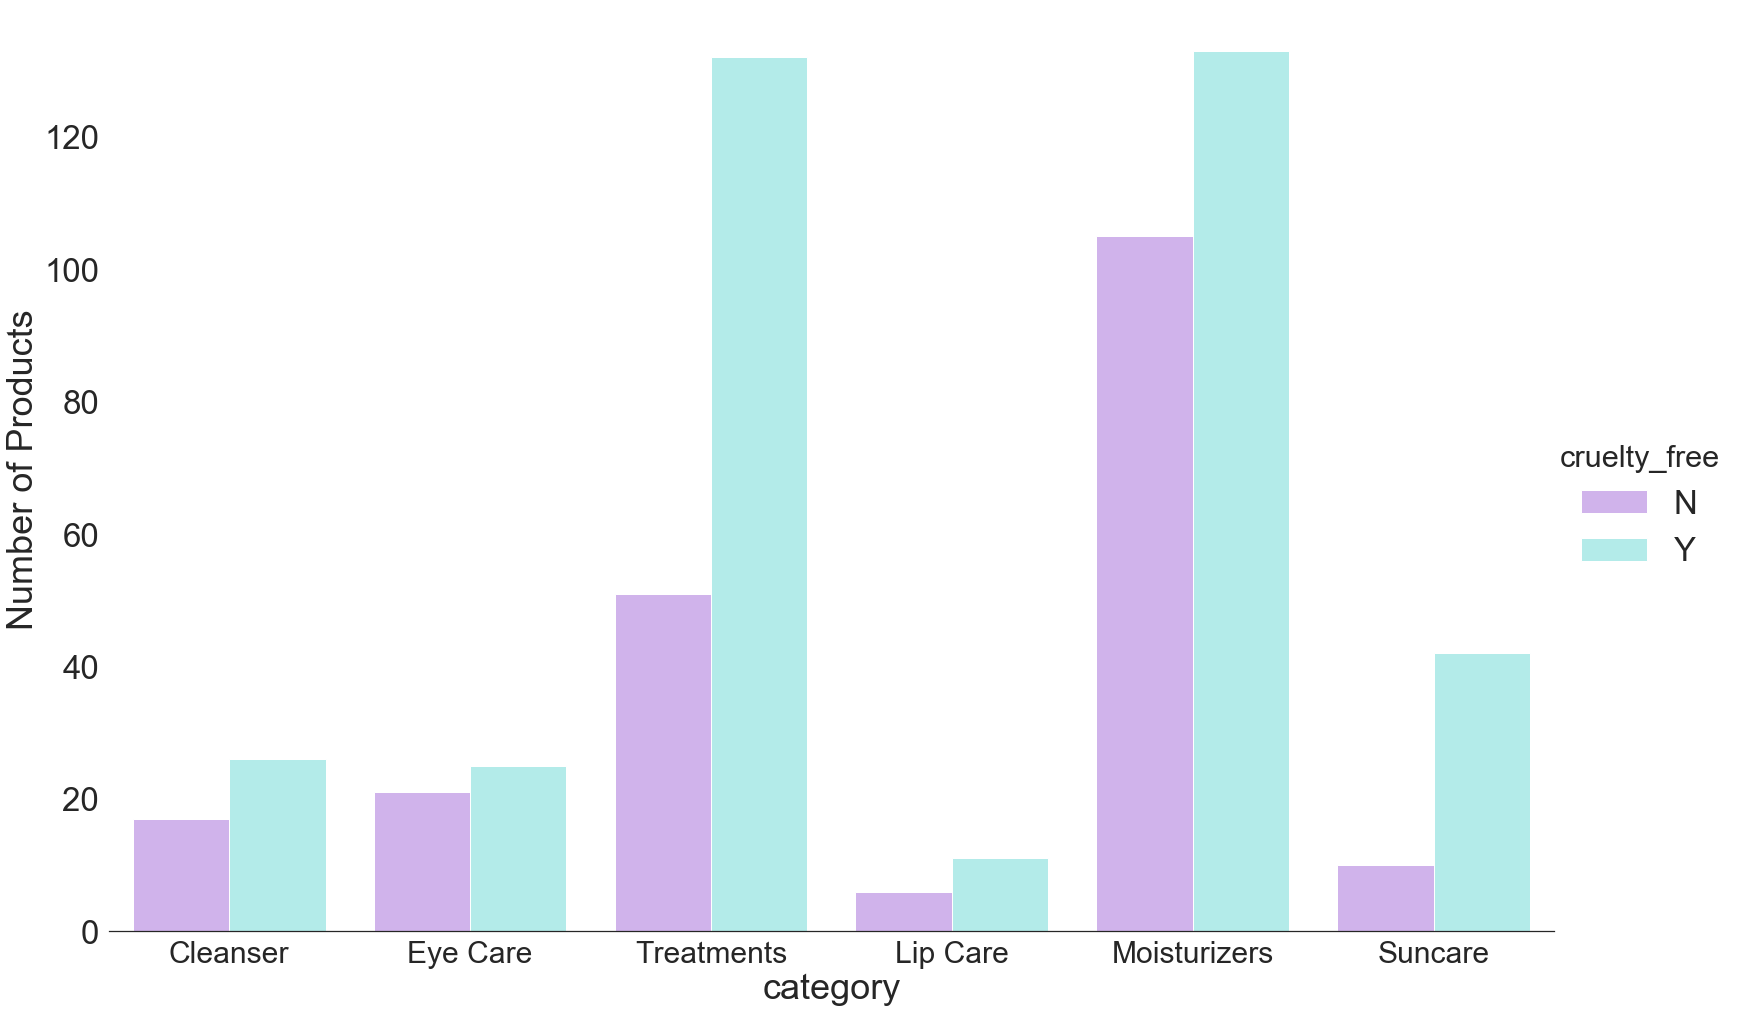

In [113]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="category", y="count", hue="cruelty_free", height=15, aspect=1.5, \
                data=test3, kind="bar", palette=["#D0A9F5","#A9F5F2"])

sns.set(font_scale=3) 
sns.set_style(style="white")

g.despine(left=True)
g.set_ylabels("Number of Products")

labels = ['Cleanser', 'Eye Care', 'Treatments', 'Lip Care','Moisturizers','Suncare']


g.set_xticklabels(labels, fontsize=30)